# K-means

metodi per misurare la distanza:
* single linkage
* complete linkage 
* average
* Ward
* centroids

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
PimaDB=pd.read_csv("https://raw.githubusercontent.com/ettore1461/My-Introduction-to-Statistical-Learning/master/Dataset/PimaDB/PimaDB.csv")

In [3]:
PimaDB.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
Data=PimaDB[["Pregnancies","Glucose","Outcome"]]

X=Data.iloc[:,0:2]
Y=Data.iloc[:,-1]

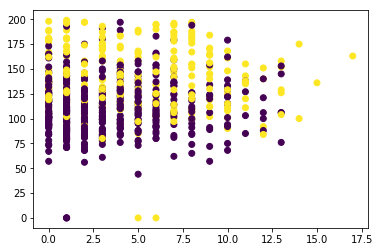

In [5]:
plt.scatter(X.Pregnancies,X.Glucose,c=Y)

In [6]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [7]:
kmeans=KMeans(n_clusters=2)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=123)

In [14]:
kmeans.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
pred= kmeans.predict(x_test)

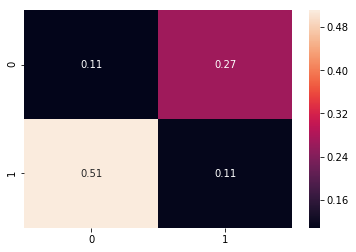

In [11]:
sns.heatmap(confusion_matrix(pred,y_test)/pred.size,annot=True)

In [12]:
print(classification_report(pred,y_test))

             precision    recall  f1-score   support

          0       0.17      0.29      0.22        87
          1       0.30      0.18      0.22       144

avg / total       0.25      0.22      0.22       231



Text(0,0.5,'Var')

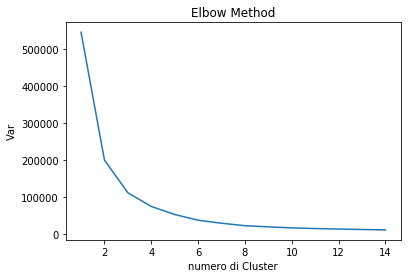

In [16]:
cl=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=12345)
    kmeans.fit(x_train)
    cl.append(kmeans.inertia_)
    
plt.figure()
plt.plot(range(1,15),cl)
plt.title("Elbow Method")
plt.xlabel("numero di Cluster")
plt.ylabel("Var")